In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<div style="text-align: center; font-size: large">K-Mean</div>

In [28]:
df = pd.read_csv("data.csv", sep="\t")
df

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


<div style="text-align: center; font-size: medium">Prenons uniquement les colonnes utiles pour le K-Mean</div>

In [29]:
df.drop(['race','age','engnat','gender','hand','source','country'], axis=1,inplace=True)
kmeans = KMeans(n_clusters=5).fit(df)

<div style="text-align: center; font-size: medium">On utilise évidement 5 clusters qui correspondent aux 5 types de personalités du test</div>

In [30]:
print(len(kmeans.cluster_centers_))
kmeans.cluster_centers_[4]
#On a bien 5 cluster (vecteur) de dimention 50 (pour 50 question)

5


array([1.77016998, 3.60258559, 2.2748384 , 4.06176682, 2.35360306,
       3.29159684, 1.68949006, 4.00095763, 2.24251855, 4.51592052,
       4.23796983, 2.51424467, 4.51951161, 2.2520948 , 3.75125688,
       4.08307398, 4.08498923, 3.90136462, 4.09791717, 3.99976059,
       2.52238449, 3.42063682, 2.45726598, 3.93344506, 2.43548001,
       3.98443859, 2.6983481 , 3.51352645, 3.80584151, 3.09719895,
       2.87455111, 3.26765621, 3.79530764, 3.43452238, 2.23246349,
       3.45319607, 3.52693321, 3.02777113, 2.8549198 , 3.35527891,
       3.4771367 , 2.51879339, 4.14292554, 2.28776634, 3.47905195,
       2.03998085, 3.74024419, 3.20277711, 4.28513287, 3.68781422])

<div style="text-align: center; font-size: medium">Comparont les clusters créés avec le trait de personalité qui ressort le plus chez une personne</div>

In [31]:
print(len(kmeans.labels_))
cluster = kmeans.labels_ # renvoie une liste avec le cluster de chaque personne
cluster

19719


array([2, 0, 1, ..., 4, 4, 4], dtype=int32)

In [32]:
personalites = pd.read_csv('data_with_mean&max.csv', usecols=["personality_type"])['personality_type'] #j'import uniquement le type de personalité car je n'ai pas besoin du reste
personalites

0        E
1        A
2        N
3        N
4        A
        ..
19714    N
19715    C
19716    N
19717    N
19718    C
Name: personality_type, Length: 19719, dtype: object

In [33]:
percentagePersonalities = personalites.value_counts().apply(lambda r: (r/personalites.value_counts().sum())*100).sort_values()
percentagePersonalities

C    12.957047
E    13.641665
A    16.674274
O    27.820883
N    28.906131
Name: personality_type, dtype: float64

<div style="text-align: center; font-size: medium">La crosstab vas nous permettre de compter chaque personalitée en fonction du cluster</div>

In [34]:
crosstab = pd.crosstab(personalites,cluster)
crosstab

col_0,0,1,2,3,4
personality_type,,,,,
A,958,695,1028,346,261
C,711,508,614,410,312
E,859,416,738,530,147
N,467,1992,35,207,2999
O,1161,984,1634,1248,459


On tombe en général sur 2 clusters représentant le type N et 3 représentant le type O

In [35]:
percentage50 = crosstab.apply(lambda r: r.max(), axis=0)
percentage50 = percentage50.apply(lambda r: (r/percentage50.sum())*100).sort_values().reset_index(drop=True)
percentage50

0    12.851450
1    13.814479
2    18.087226
3    22.050033
4    33.196812
dtype: float64

<div style="text-align: center; font-size: medium">Testons en utilisant la moyenne par type de questions</div>

In [36]:
df = pd.read_csv('data_with_mean&max.csv', usecols=list('OCEAN'))
kmeans = KMeans(n_clusters=5).fit(df)
crosstab = pd.crosstab(personalites, kmeans.labels_)
crosstab

col_0,0,1,2,3,4
personality_type,,,,,
A,779,203,1060,209,1037
C,563,85,406,295,1206
E,715,103,987,168,717
N,0,3448,281,1837,134
O,1814,278,878,328,2188


Avec la moyenne par type de question on retrouve 1 cluster de représentant le type A, 2 représentant le type O et 2 représentant le type N 

In [37]:
percentage5 = crosstab.apply(lambda r: r.max(), axis=0)
percentage5 = percentage5.apply(lambda r: (r/percentage5.sum())*100).sort_values().reset_index(drop=True)
percentage5

0    10.244515
1    17.531652
2    17.753938
3    21.146226
4    33.323669
dtype: float64

In [38]:
percentageDf = pd.DataFrame([percentage5, percentage50, percentagePersonalities.reset_index(drop=True)], index=["kmean5", "kmean50", "personalites"])
percentageDf.columns = percentagePersonalities.index
percentageDf

,C,E,A,O,N
kmean5,10.244515,17.531652,17.753938,21.146226,33.323669
kmean50,12.851450,13.814479,18.087226,22.050033,33.196812
personalites,12.957047,13.641665,16.674274,27.820883,28.906131


<AxesSubplot:>

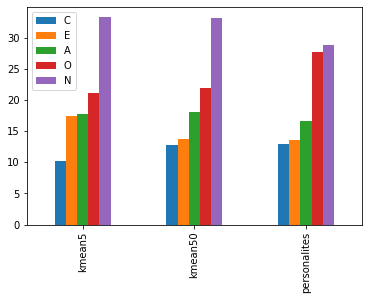

In [39]:
percentageDf.plot.bar(legend=True)

<div style="text-align: center; font-size: medium">La numérotation des clusters dans le K-Mean varie à chaque execution de celui-ci. En effet les clusters sont des points placés au hasard sur l'hyperplans de dimention 50. Ou chaque participant est représenté par un point qui a pour coordonées les réponses aux questions</div>

<div style="text-align: center; font-size: medium">On ne retrouve pas les catégories escompté. En effet la manière dont nous choisisons un seul type de personnalité chez une personne grâce au question n'est pas optimal.<br/>
Une personne est un mélange de plusieurs personnalité et prendre uniquement celle qui ressort le plus empeche une autre qui à peut être, à peu de chose près, la même prépondérance chez la personne.<br/>
L'algorythme K-Mean prend lui en compte toutes les facettes de personnalité en même temps
</div>